In [1]:
import pandas as pd
import re

# Load CSV files
df_22 = pd.read_csv('/content/gpt_22_final.csv')
df_23 = pd.read_csv('/content/gpt_23_final.csv')


In [2]:
# Function to clean text data
def clean_text(text):
    text = re.sub(r'\W', ' ', str(text))
    text = text.lower()
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    return text

# Apply cleaning function to text in each DataFrame
df_22['cleaned_text'] = df_22['Text'].apply(clean_text)
df_23['cleaned_text'] = df_23['Text'].apply(clean_text)


In [5]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.6 MB/s eta 0:00:00


In [6]:
!pip install empath

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 801.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for empath: filename=empath-0.89-py3-none-any.whl size=57800 sha256=df5a2077bbb0eb1b21515c10a90d802ceb555bec0e5e1f748bc76d11f6c26ccd
  Stored in directory: /root/.cache/pip/wheels/92/b3/83/9eb2c6199881e2385a59d99bd911363475060ebeb4bdb27242
Successfully built empath


In [7]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from empath import Empath
from nltk.corpus import stopwords
from gensim import corpora, models
import nltk
import re

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores
def analyze_sentiment(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

# Analyze sentiment for each DataFrame
df_22['compound'] = df_22['cleaned_text'].apply(analyze_sentiment)
df_23['compound'] = df_23['cleaned_text'].apply(analyze_sentiment)


In [9]:
# Convert the 'Date' column to datetime, handling errors
df_22['Date'] = pd.to_datetime(df_22['Date'], errors='coerce')
df_23['Date'] = pd.to_datetime(df_23['Date'], errors='coerce')

# Dropping rows where dates could not be parsed
df_22 = df_22.dropna(subset=['Date'])
df_23 = df_23.dropna(subset=['Date'])


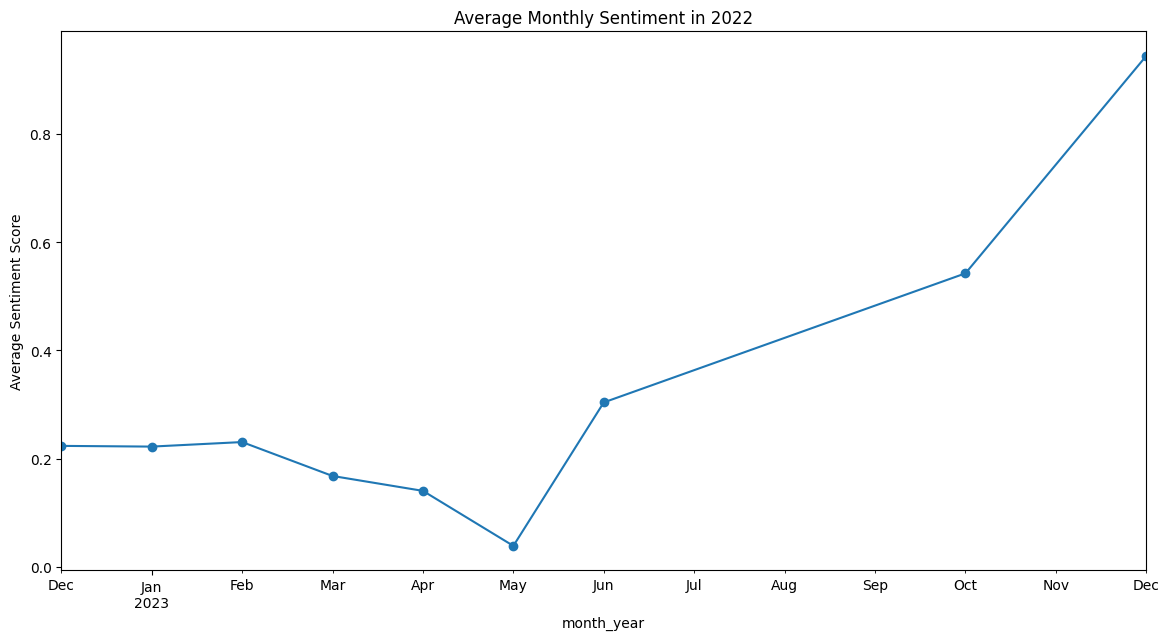

In [10]:
import matplotlib.pyplot as plt

# Aggregate the mean sentiment per month for 2022 data
df_22['month_year'] = df_22['Date'].dt.to_period('M')
monthly_sentiment_22 = df_22.groupby('month_year')['compound'].mean()

# Plot the sentiment over time
plt.figure(figsize=(14, 7))
monthly_sentiment_22.plot(title='Average Monthly Sentiment in 2022', marker='o')
plt.ylabel('Average Sentiment Score')
plt.show()


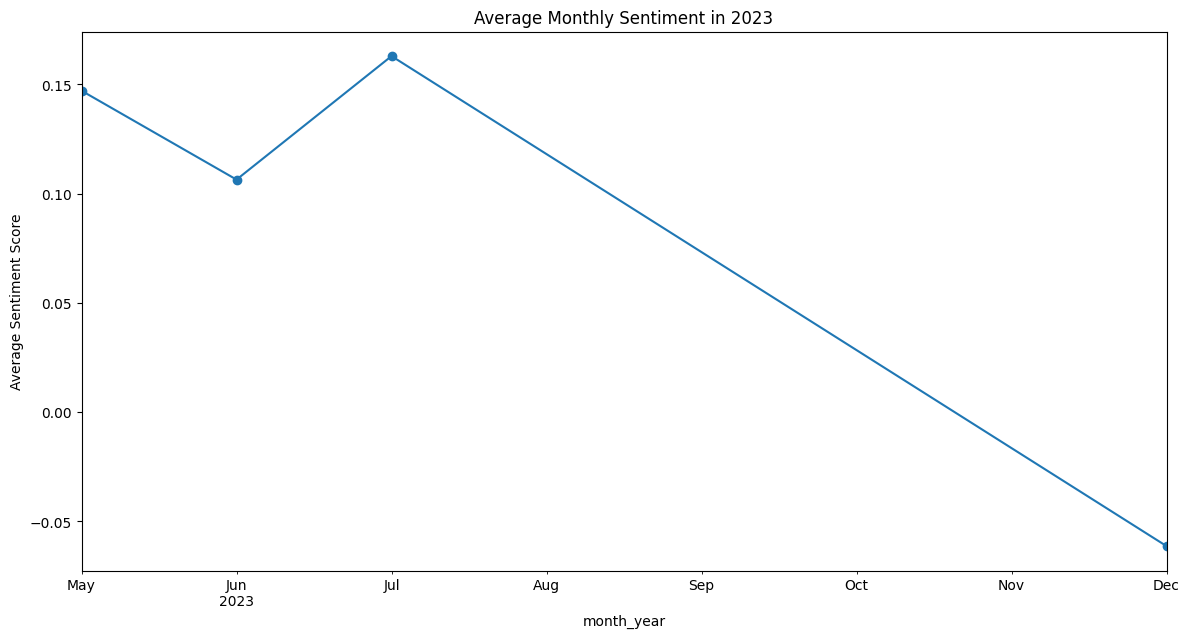

In [11]:
# Aggregate the mean sentiment per month for 2023 data
df_23['month_year'] = df_23['Date'].dt.to_period('M')
monthly_sentiment_23 = df_23.groupby('month_year')['compound'].mean()

# Plot the sentiment over time
plt.figure(figsize=(14, 7))
monthly_sentiment_23.plot(title='Average Monthly Sentiment in 2023', marker='o')
plt.ylabel('Average Sentiment Score')
plt.show()


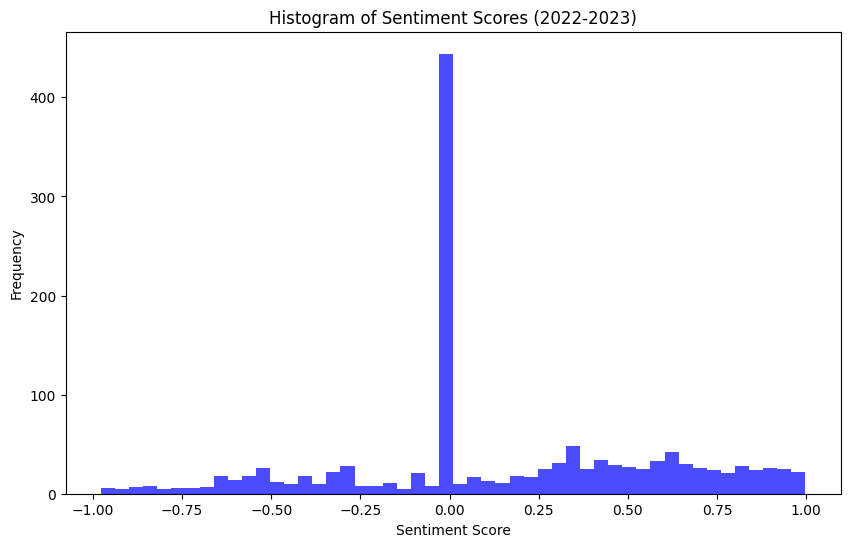

In [12]:
import matplotlib.pyplot as plt

# Combine the sentiment scores from both years
combined_sentiments = pd.concat([df_22['compound'], df_23['compound']])

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(combined_sentiments, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Sentiment Scores (2022-2023)')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()


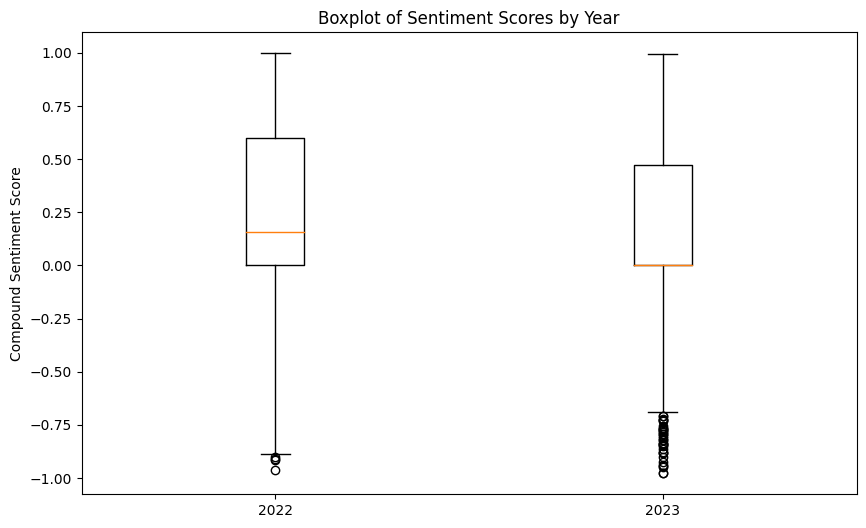

In [13]:
# Add a 'Year' column to each dataframe for grouping in the plot
df_22['Year'] = df_22['Date'].dt.year
df_23['Year'] = df_23['Date'].dt.year

# Combine the dataframes with the 'Year' column
combined_df = pd.concat([df_22[['compound', 'Year']], df_23[['compound', 'Year']]])

# Plotting the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([df_22['compound'], df_23['compound']], labels=['2022', '2023'])
plt.title('Boxplot of Sentiment Scores by Year')
plt.ylabel('Compound Sentiment Score')
plt.show()

<ipython-input-14-90c7f13bb43d>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_22['compound'], shade=True, color="r", label="2022")
<ipython-input-14-90c7f13bb43d>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_23['compound'], shade=True, color="b", label="2023")


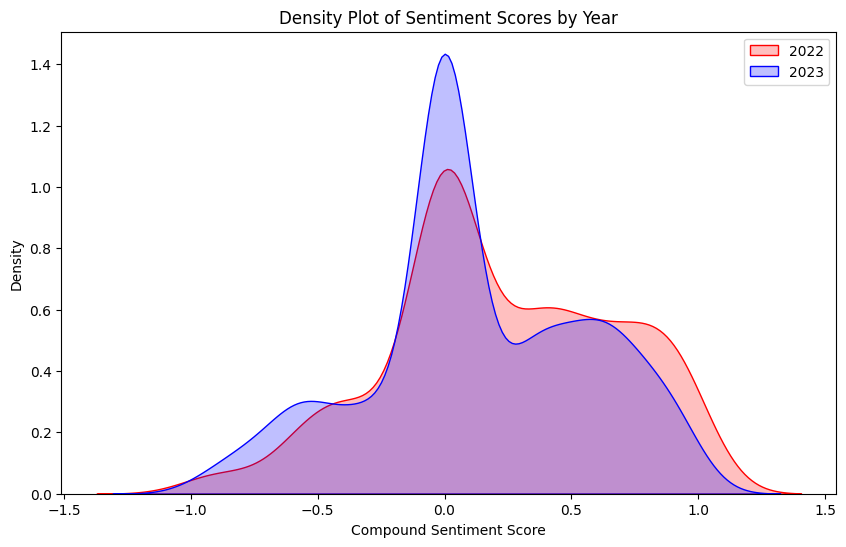

In [14]:
import seaborn as sns

# Plotting the density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df_22['compound'], shade=True, color="r", label="2022")
sns.kdeplot(df_23['compound'], shade=True, color="b", label="2023")
plt.title('Density Plot of Sentiment Scores by Year')
plt.xlabel('Compound Sentiment Score')
plt.legend()
plt.show()

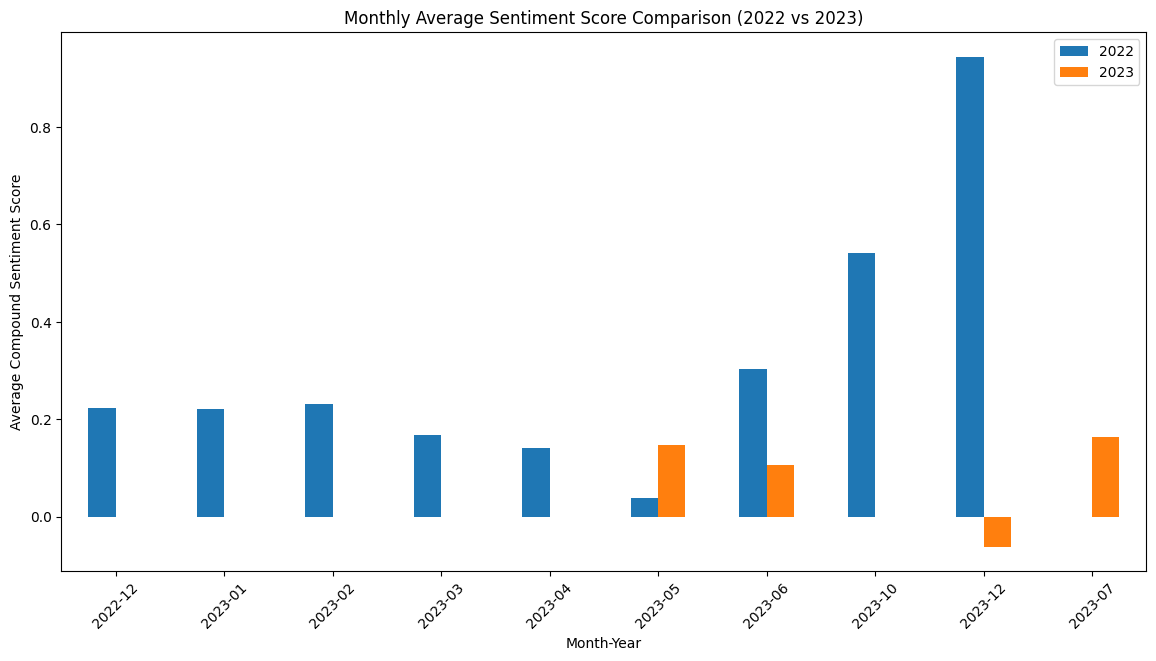

In [15]:
# Combine the month-year data for plotting
combined_monthly_sentiment = pd.concat([
    monthly_sentiment_22.rename('2022'),
    monthly_sentiment_23.rename('2023')
], axis=1)

# Plotting side by side for comparison
combined_monthly_sentiment.plot(kind='bar', figsize=(14, 7))
plt.title('Monthly Average Sentiment Score Comparison (2022 vs 2023)')
plt.xlabel('Month-Year')
plt.ylabel('Average Compound Sentiment Score')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [19]:
!pip install gensim
import gensim

In [32]:
# from gensim.parsing.preprocessing import STOPWORDS
# from nltk.stem import WordNetLemmatizer, SnowballStemmer
# import numpy as np
# from gensim import corpora, models
# import nltk

# nltk.download('wordnet')

# stemmer = SnowballStemmer('english')
# lemmatizer = WordNetLemmatizer()

# def lemmatize_stemming(text):
#     return stemmer.stem(lemmatizer.lemmatize(text, pos='v'))

# # Tokenize and lemmatize
# def preprocess(text):
#     result = []
#     for token in gensim.utils.simple_preprocess(text):
#         if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
#             result.append(lemmatize_stemming(token))
#     return result

# # Apply the preprocessing to the cleaned text for each dataset
# df_22['processed_text'] = df_22['cleaned_text'].map(preprocess)
# df_23['processed_text'] = df_23['cleaned_text'].map(preprocess)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# # Create a dictionary and corpus for LDA for 2022 data
# dictionary_22 = corpora.Dictionary(df_22['processed_text'])
# dictionary_22.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
# corpus_22 = [dictionary_22.doc2bow(text) for text in df_22['processed_text']]

# # Create a dictionary and corpus for LDA for 2023 data
# dictionary_23 = corpora.Dictionary(df_23['processed_text'])
# dictionary_23.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
# corpus_23 = [dictionary_23.doc2bow(text) for text in df_23['processed_text']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# # LDA model for 2022 data
# lda_model_22 = models.LdaModel(corpus_22, num_topics=5, id2word=dictionary_22, passes=10)

# # LDA model for 2023 data
# lda_model_23 = models.LdaModel(corpus_23, num_topics=5, id2word=dictionary_23, passes=10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# # Print the topics for 2022 data
# print("Topics for 2022 data:")
# for idx, topic in lda_model_22.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))
# print("\n")

# # Print the topics for 2023 data
# print("Topics for 2023 data:")
# for idx, topic in lda_model_23.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
# import matplotlib.pyplot as plt
# import numpy as np

# # Function to plot top words for each topic
# def plot_top_words(lda_model, nb_topics, nb_words):
#     for i in range(nb_topics):
#         fig, ax = plt.subplots(figsize=(8,6))
#         # Extract the top words per topic
#         top_words = {word: prop for word, prop in lda_model.show_topic(i, topn=nb_words)}
#         words = list(top_words.keys())
#         proportions = list(top_words.values())
#         # Create a bar plot
#         ax.barh(words, proportions)
#         ax.invert_yaxis()  # labels read top-to-bottom
#         ax.set_xlabel('Proportion')
#         ax.set_title(f'Top {nb_words} words in LDA Topic {i}')
#         plt.show()

# # Specify the number of topics and top words you want to visualize
# num_topics = 5
# num_words = 10

# # Visualize top words for each topic for the 2022 data
# print("Top words in topics for 2022 data:")
# plot_top_words(lda_model_22, num_topics, num_words)

# # Repeat for the 2023 data
# print("Top words in topics for 2023 data:")
# plot_top_words(lda_model_23, num_topics, num_words)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


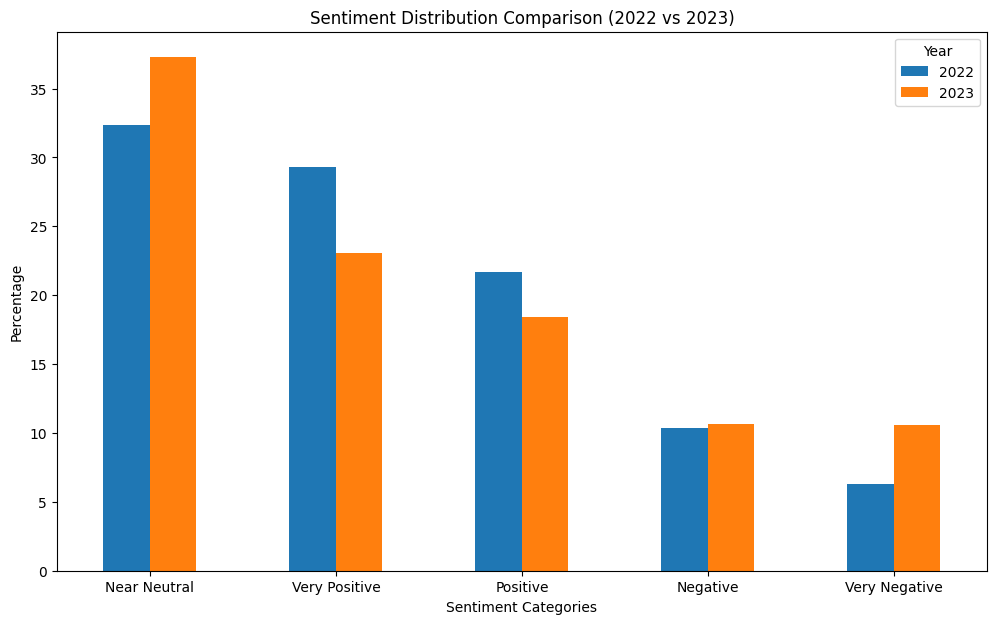

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_22 and df_23 are already loaded and have a 'compound' column from VADER

# Define sentiment categories
def sentiment_category(score):
    if score > 0.5:
        return 'Very Positive'
    elif score > 0.1:
        return 'Positive'
    elif score > -0.1:
        return 'Near Neutral'
    elif score > -0.5:
        return 'Negative'
    else:
        return 'Very Negative'

# Categorize sentiments for each dataframe
df_22['Sentiment_Category'] = df_22['compound'].apply(sentiment_category)
df_23['Sentiment_Category'] = df_23['compound'].apply(sentiment_category)

# Calculate the percentage of each sentiment category for both dataframes
sentiment_percentage_22 = df_22['Sentiment_Category'].value_counts(normalize=True) * 100
sentiment_percentage_23 = df_23['Sentiment_Category'].value_counts(normalize=True) * 100

# Combine the percentages into a single dataframe
df_sentiment_percentages = pd.DataFrame({'2022': sentiment_percentage_22, '2023': sentiment_percentage_23}).fillna(0)

# Plotting
df_sentiment_percentages.plot(kind='bar', figsize=(12, 7))
plt.title('Sentiment Distribution Comparison (2022 vs 2023)')
plt.xlabel('Sentiment Categories')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Year')
plt.show()
